In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle 
import pandas as pd
from datetime import date
from sklearn.cluster import KMeans

from IPython.display import HTML
from matplotlib import animation, rc
from matplotlib import style
#rc('animation', html='html5')

from datetime import datetime

import sys
sys.path.append('./../')
from utility.eval_metric import _measure_metric,accuracy

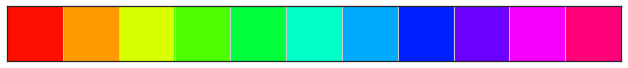

In [2]:
import seaborn as sns
sns.set()
sns.set_style('white')
#sns.set_style('whitegrid')
import matplotlib
plt.rcParams["axes.grid"] = True
plt.rc('font', family='serif')
#plt.rc('font', weight='bold')

#current_palette = sns.color_palette(sns.hls_palette(5+1, l=.6, s=1.0))
current_palette = sns.color_palette(sns.hls_palette(10+1, l=.5, s=1.0))
sns.palplot(current_palette)
current_palette = np.asarray(current_palette)

In [3]:
#saved_pickle_path = './result_pickle_aiedu2/'
saved_pickle_path = './result_pickle_scalable_exp1-2/' #for table
#saved_pickle_path = './result_pickle_scalable_exp1-22/' #for figure
format_name = '.pickle'

In [4]:
def get_together(saved_pickle_path, saved_filename1, saved_filename2, format_name):
    with open(saved_pickle_path + saved_filename1 + format_name, 'rb') as f:
        result_pickle1 = pickle.load(f) # 단 한줄씩 읽어옴
    with open(saved_pickle_path + saved_filename2 + format_name, 'rb') as f:
        result_pickle2 = pickle.load(f) # 단 한줄씩 읽어옴       
    result_pickle = {}
    result_pickle['train_elbo'] = result_pickle1['train_elbo'] + result_pickle2['train_elbo']
    result_pickle['train_accuracy'] = result_pickle1['train_accuracy'] + result_pickle2['train_accuracy']
    result_pickle['test_elbo'] = result_pickle1['test_elbo'] + result_pickle2['test_elbo']
    result_pickle['test_accuracy'] = result_pickle1['test_accuracy'] + result_pickle2['test_accuracy']
    result_pickle['test_pred'] = result_pickle1['test_pred'] + result_pickle2['test_pred']
    result_pickle['Trained_Model'] = result_pickle1['Trained_Model'] + result_pickle2['Trained_Model']
    result_pickle['train_time'] = result_pickle1['train_time'] + result_pickle2['train_time']
    result_pickle['num_cluster_list'] = result_pickle1['num_cluster_list'] + result_pickle2['num_cluster_list']
    result_pickle['test_elbo_before'] = result_pickle1['test_elbo_before'] + result_pickle2['test_elbo_before']
    result_pickle['test_accuracy_before'] = result_pickle1['test_accuracy_before'] + result_pickle2['test_accuracy_before']
    result_pickle['Data_setting'] = result_pickle1['Data_setting']
    result_pickle['Exp_setting'] = result_pickle1['Exp_setting']
    result_pickle['HMMGP_setting'] = result_pickle1['HMMGP_setting']
    result_pickle['Exp_setting']['num_rep_exp'] = result_pickle1['Exp_setting']['num_rep_exp']  + result_pickle2['Exp_setting']['num_rep_exp'] 
    #return result_pickle1, result_pickle2
    return result_pickle

In [5]:
import glob

In [6]:
def get_result(saved_pickle_path, saved_filename1, format_name):
    with open(saved_pickle_path + saved_filename1 + format_name, 'rb') as f:
        result_pickle1 = pickle.load(f) # 단 한줄씩 읽어옴
    return result_pickle1

def load_pickle(pickle_filepath):
    with open(pickle_filepath, 'rb') as f:
        result_pickle1 = pickle.load(f) # 단 한줄씩 읽어옴
    return result_pickle1
    

In [7]:
filenamelist = glob.glob(saved_pickle_path + '*' + format_name)

In [8]:
target_filenamelist = []
target_filenamelist2 = []
for ith_filelist in filenamelist:
    if ith_filelist.split('/')[-1].split('_')[-1][:9] == 'numhidden': 
        #print(ith_filelist.split('_')[6])
        #if ith_filelist.split('_')[5] == 'emissiongpsm': #aidedu2
        if ith_filelist.split('_')[6] == 'emissiongpsm':  #scalable1-2          
            target_filenamelist.append(ith_filelist)
        else:
            target_filenamelist2.append(ith_filelist)
            
        #print(ith_filelist)

In [9]:
target_filenamelist

[]

In [10]:
load_pickle(target_filenamelist2[0]).keys()

IndexError: list index out of range

In [ ]:
load_pickle(target_filenamelist2[0])['etr_lik_list']

In [ ]:
def get_results(target_target_filenamelist):
    results = {}
    for ith_target_filename in target_target_filenamelist:
        loaded_pickle = load_pickle(ith_target_filename)
        #loaded_pickle.keys()
        emission,train,totalspt = loaded_pickle['HMMGP_setting']['emission'],loaded_pickle['HMMGP_setting']['train'],loaded_pickle['HMMGP_setting']['Num_RRFFSpectralPt_total']
        numQ,numhidden = loaded_pickle['Exp_setting']['Num_Q'],loaded_pickle['Exp_setting']['Num_HiddenState']
        sublen,fulllen = loaded_pickle['HMMGP_setting']['Len_Batch'], loaded_pickle['HMMGP_setting']['Len_Full']
        modeldescription = (numhidden,emission,train,numQ,fulllen,sublen,totalspt)
        target_eval_list = [ 'tr_elbo_list', 'tr_lik_list', 'te_elbo_list', 'te_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list',
                             'etr_lik_list', 'ete_lik_list', 'etrain_accuracy_list', 'etest_accuracy_list']
        try:
            static = {}
            for ith_key in target_eval_list:
                mean,std = np.asarray(loaded_pickle[ith_key]).mean(axis=0).round(3),np.asarray(loaded_pickle[ith_key]).std(axis=0).round(3)
                #static[ith_key] = (mean[0],std[0],mean[-1],std[-1])      
                if ith_key in ['train_accuracy_list', 'test_accuracy_list']:
                    static[ith_key] = (mean[0],(std[0]/np.sqrt(5)).round(3),mean[-1],(std[-1]/np.sqrt(5)).round(3))      
                else:
                    static[ith_key] = (mean[-1],(std[-1]/np.sqrt(5)).round(3))      
                
            results[modeldescription] = static
        except:
            pass
    return results










def get_drawresults(target_target_filenamelist):
    results = {}
    for ith_target_filename in target_target_filenamelist:
        loaded_pickle = load_pickle(ith_target_filename)
        #loaded_pickle.keys()
        emission,train,totalspt = loaded_pickle['HMMGP_setting']['emission'],loaded_pickle['HMMGP_setting']['train'],loaded_pickle['HMMGP_setting']['Num_RRFFSpectralPt_total']
        numQ,numhidden = loaded_pickle['Exp_setting']['Num_Q'],loaded_pickle['Exp_setting']['Num_HiddenState']
        sublen,fulllen = loaded_pickle['HMMGP_setting']['Len_Batch'], loaded_pickle['HMMGP_setting']['Len_Full']
        modeldescription = (numhidden,emission,train,numQ,fulllen,sublen,totalspt)

        target_eval_list = [ 'tr_elbo_list', 'tr_lik_list', 'te_elbo_list', 'te_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list',
                             'etr_lik_list', 'ete_lik_list', 'etrain_accuracy_list', 'etest_accuracy_list']
#         static = {}        
#         for ith_key in target_eval_list:
#             mean,std = np.asarray(loaded_pickle[ith_key]).mean(axis=0).round(3),np.asarray(loaded_pickle[ith_key]).std(axis=0).round(3)
#             if ith_key in ['train_time']:
#                 print(np.cumsum(mean))
#                 static[ith_key] = (np.cumsum(mean))      
#             else:
#                 static[ith_key] = (mean,std)    

#         results[modeldescription] = static
        
        try:
            static = {}
            for ith_key in target_eval_list:
                mean,std = np.asarray(loaded_pickle[ith_key]).mean(axis=0).round(3),np.asarray(loaded_pickle[ith_key]).std(axis=0).round(3)
                if ith_key in ['train_time']:
                    static[ith_key] = (np.cumsum(mean))      
                else:
                    static[ith_key] = (mean,std)    
                
            results[modeldescription] = static
        except:
            pass
        
        
    return results

In [11]:
import copy 
from collections import OrderedDict

#target_eval_list = [ 'tr_elbo_list', 'tr_lik_list', 'te_elbo_list', 'te_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list']
target_eval_list = [ 'te_elbo_list', 'te_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list','etr_lik_list', 'ete_lik_list', 'etrain_accuracy_list', 'etest_accuracy_list']

def filter_results(results_dict,numhidden=4,numQ=4,target_eval_list=['tr_elbo_list']):
    print('#'*200)
    print('#'*200)    
    #tmp_dict = OrderedDict()
    tmp_dict = {}
    #ordered_result = OrderedDict()
    for ith_key in results_dict:
        if ith_key[0] == numhidden and ith_key[3]==numQ:
#             print('(numhidden,emission,train,numQ,fulllen,sublen,totalspt)='+ str(ith_key))
#             for iith_key in target_eval_list:            
#                 print(iith_key,results_dict[ith_key][iith_key])     #'start,final'           
#                 #print(iith_key,results_dict[ith_key][iith_key][-2:]) #'final'
#             print('\n')
            if ith_key[1] == 'GPSM':
                tmp_dict[int(ith_key[-2])] = ith_key
            else:                
                tmp_dict[int(ith_key[-1])] = ith_key
    
    #sorted_dict = sorted(tmp_dict.items())
    #print(sorted_dict )
    for ith in sorted(tmp_dict.items()):
        #print(ith)
        ith_key = ith[1]        
        print('(numhidden,emission,train,numQ,fulllen,sublen,totalspt)='+ str(ith_key))        
        for iith_key in target_eval_list:            
            #print(iith_key,results_dict[ith_key][iith_key])     #'start,final'           
            print(iith_key,results_dict[ith_key][iith_key][-2:]) #'final'
        print('')
    return 
  
    
    
def filter_results_draw(result_dict,numhidden=4,numQ=4,target_eval_list=['tr_elbo_list']):
    result_dict_cp = copy.deepcopy(result_dict)
    for ith_key in result_dict_cp :
        if ith_key[0] == numhidden and ith_key[3]==numQ:
            pass
        else:
            result_dict_cp[ith_key] = None
            
    return result_dict_cp 

## exp2

In [12]:
#target_eval_list = [ 'te_lik_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list']
#target_eval_list = [ 'test_accuracy_list', 'te_lik_list',  'bic_list','train_time','etr_lik_list', 'ete_lik_list', 'etrain_accuracy_list', 'etest_accuracy_list']
target_eval_list = [ 'test_accuracy_list', 'te_lik_list','train_time', 'ete_lik_list','etest_accuracy_list']

results = get_results(target_filenamelist2)
# filter_results(results,numhidden=4,numQ=4,target_eval_list=target_eval_list)
# filter_results(results,numhidden=6,numQ=4,target_eval_list=target_eval_list)
# filter_results(results,numhidden=8,numQ=4,target_eval_list=target_eval_list)
# filter_results(results,numhidden=10,numQ=4,target_eval_list=target_eval_list)


filter_results(results,numhidden=8,numQ=3,target_eval_list=target_eval_list)
filter_results(results,numhidden=8,numQ=3,target_eval_list=target_eval_list)


NameError: name 'get_results' is not defined

In [ ]:
# filter_results(results,numhidden=4,numQ=5,target_eval_list=target_eval_list)
# filter_results(results,numhidden=6,numQ=5,target_eval_list=target_eval_list)
# filter_results(results,numhidden=8,numQ=5,target_eval_list=target_eval_list)
# filter_results(results,numhidden=10,numQ=5,target_eval_list=target_eval_list)

## drawfigures

In [13]:
target_eval_list = [ 'te_elbo_list', 'te_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list']
results_draw = get_drawresults(target_filenamelist2)
target_result = filter_results_draw(results_draw,numhidden=8,numQ=3,target_eval_list=target_eval_list)


NameError: name 'get_drawresults' is not defined

In [14]:
#target_result = filter_results_draw(results_draw ,numhidden=10,numQ=5,target_eval_list=target_eval_list)
#draw_static = 'te_elbo_list'
draw_static = 'te_lik_list'
#draw_static = 'test_accuracy_list'


figsiz=(10,4)
fig = plt.figure(figsize = figsiz)
#for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
for ith_key in target_result:
    if target_result[ith_key] is not None:
        mean,stderr = target_result[ith_key][draw_static]
        iteration = target_result[ith_key]['train_time']
        #iteration = np.arange(1,len(mean)+1)

        plt.plot(iteration ,mean , linewidth = 3.0 ,label = str(ith_key))
        plt.fill_between(iteration, mean-stderr, mean+stderr, alpha=0.5 ) 



plt.minorticks_off()
plt.xlabel('time (sec)',fontsize = 18)
plt.ylabel(draw_static,fontsize =  18)
plt.xticks(fontsize =  18)
plt.yticks(fontsize = 18)
#plt.legend(loc='lower right',fontsize = 15)
#plt.legend(loc='upper left',fontsize = 12)
plt.legend(loc='best',fontsize = 12)

fig.tight_layout()    
#plt.savefig(save_figure_path + 'train_accuracy_log'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()




draw_static = 'test_accuracy_list'
figsiz=(10,4)
fig = plt.figure(figsize = figsiz)
#for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
for ith_key in target_result:
    if target_result[ith_key] is not None:
        mean,stderr = target_result[ith_key][draw_static]
        iteration = target_result[ith_key]['train_time']
        #iteration = np.arange(1,len(mean)+1)

        plt.plot(iteration ,mean , linewidth = 3.0 ,label = str(ith_key))
        plt.fill_between(iteration, mean-stderr, mean+stderr, alpha=0.5 ) 



plt.minorticks_off()
plt.xlabel('time (sec)',fontsize = 18)
plt.ylabel(draw_static,fontsize =  18)
plt.xticks(fontsize =  18)
plt.yticks(fontsize = 18)
#plt.legend(loc='lower right',fontsize = 15)
#plt.legend(loc='upper left',fontsize = 12)
plt.legend(loc='best',fontsize = 12)

fig.tight_layout()    
#plt.savefig(save_figure_path + 'train_accuracy_log'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()




NameError: name 'target_result' is not defined

<Figure size 720x288 with 0 Axes>

In [ ]:
draw_static = 'ete_lik_list'
figsiz=(10,4)
fig = plt.figure(figsize = figsiz)
#for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
for ith_key in target_result:
    if target_result[ith_key] is not None:
        mean,stderr = target_result[ith_key][draw_static]
        iteration = target_result[ith_key]['train_time']
        #iteration = np.arange(1,len(mean)+1)

        plt.plot(iteration ,mean , linewidth = 3.0 ,label = str(ith_key))
        plt.fill_between(iteration, mean-stderr, mean+stderr, alpha=0.5 ) 



plt.minorticks_off()
plt.xlabel('time (sec)',fontsize = 18)
plt.ylabel(draw_static,fontsize =  18)
plt.xticks(fontsize =  18)
plt.yticks(fontsize = 18)
#plt.legend(loc='lower right',fontsize = 15)
#plt.legend(loc='upper left',fontsize = 12)
plt.legend(loc='best',fontsize = 12)

fig.tight_layout()    
#plt.savefig(save_figure_path + 'train_accuracy_log'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()


draw_static = 'etest_accuracy_list'
figsiz=(10,4)
fig = plt.figure(figsize = figsiz)
#for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
for ith_key in target_result:
    if target_result[ith_key] is not None:
        mean,stderr = target_result[ith_key][draw_static]
        iteration = target_result[ith_key]['train_time']
        #iteration = np.arange(1,len(mean)+1)

        plt.plot(iteration ,mean , linewidth = 3.0 ,label = str(ith_key))
        plt.fill_between(iteration, mean-stderr, mean+stderr, alpha=0.5 ) 



plt.minorticks_off()
plt.xlabel('time (sec)',fontsize = 18)
plt.ylabel(draw_static,fontsize =  18)
plt.xticks(fontsize =  18)
plt.yticks(fontsize = 18)
#plt.legend(loc='lower right',fontsize = 15)
#plt.legend(loc='upper left',fontsize = 12)
plt.legend(loc='best',fontsize = 12)

fig.tight_layout()    
#plt.savefig(save_figure_path + 'train_accuracy_log'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()